<a href="https://colab.research.google.com/github/MoMahmoud8/CNN_basedUpSampling/blob/main/CNN_basedUpSampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import keras
from keras import layers
import tensorflow

In [2]:
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
#x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.Conv2D(1, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [3]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 1)           73    

In [4]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

11490434/11490434 [==============================] - 2s 0us/step


In [22]:
# create gaussian noise for image

noise= np.random.normal(0,0.1,(x_train.shape[1:]))
noise.shape

(28, 28, 1)

In [23]:
#train noise
noised_img_train=[]
for i in range(len(x_train)):
  noised_img_train.append(x_train[i]+noise)

noised_img_train=np.array(noised_img_train)
noised_img_train.shape

(60000, 28, 28, 1)

In [24]:
#test noise

noised_img_test=[]
for i in range(len(x_test)):
  noised_img_test.append(x_test[i]+noise)

noised_img_test=np.array(noised_img_test)
noised_img_test.shape


(10000, 28, 28, 1)

In [25]:
autoencoder.fit(noised_img_train, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(noised_img_test, x_test))

Epoch 1/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2174 - val_loss: 0.1861
Epoch 2/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1767 - val_loss: 0.1676
Epoch 3/10
469/469 [==============================] - 3s 5ms/step - loss: 0.1624 - val_loss: 0.1565
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1545 - val_loss: 0.1507
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1498 - val_loss: 0.1471
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1464 - val_loss: 0.1441
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1437 - val_loss: 0.1416
Epoch 8/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1414 - val_loss: 0.1394
Epoch 9/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1395 - val_loss: 0.1377
Epoch 10/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1377 - val_loss: 0.1359

In [26]:
decoded_imgs = autoencoder.predict(noised_img_test)


313/313 [==============================] - 1s 2ms/step


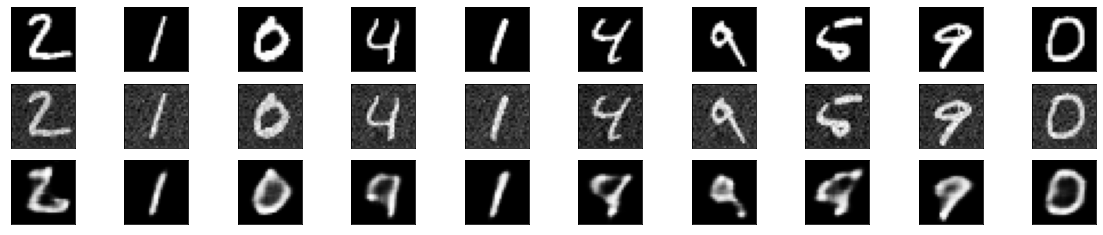

In [27]:
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(3, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


    ax = plt.subplot(3, n, i + n)
    plt.imshow(noised_img_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


    # Display reconstruction
    ax = plt.subplot(3, n, i + 2*n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [28]:
encoder = keras.Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [31]:
# create gaussian noise for encoded image

noise2= np.random.normal(0,0.1,(encoded_imgs.shape[1:]))
noise2.shape

(4, 4, 1)

In [33]:
#add noise to encoded_imgs

noise_encoded_imgs=[]
for i in range(len(encoded_imgs)):
  noise_encoded_imgs.append(encoded_imgs[i]+noise2)

noise_encoded_imgs=np.array(noise_encoded_imgs)
noise_encoded_imgs.shape

(10000, 4, 4, 1)

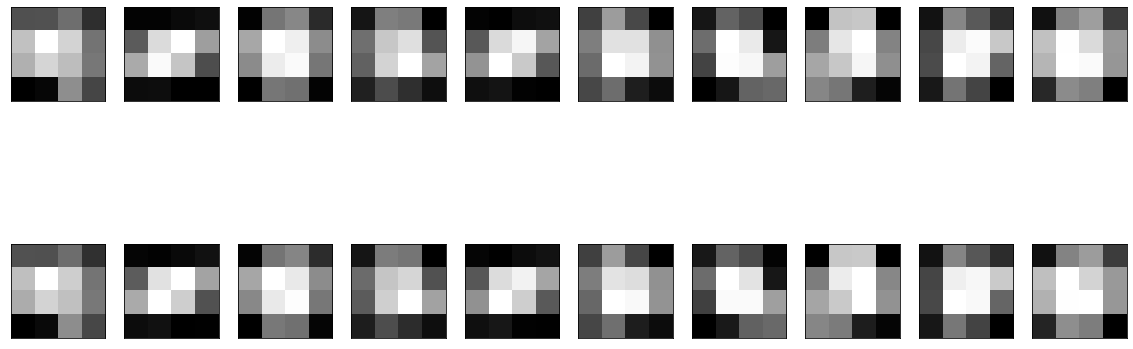

In [34]:
n = 10
plt.figure(figsize=(20, 8))
for i in range(1, n + 1):
    ax = plt.subplot(2, n, i)
    plt.imshow(encoded_imgs[i,:,:,0].reshape((4, 4)).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i+n)
    plt.imshow(noise_encoded_imgs[i,:,:,0].reshape((4, 4)).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [35]:
encoded_input = keras.Input(shape=(4, 4, 1))
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded_input)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
last = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

decoder = keras.Model(encoded_input, last)
decoder.compile(optimizer='adam', loss='binary_crossentropy')
decoder.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 4, 4, 1)]         0         
                                                                 
 conv2d_11 (Conv2D)          (None, 4, 4, 8)           80        
                                                                 
 up_sampling2d_6 (UpSampling  (None, 8, 8, 8)          0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 8, 8, 8)           584       
                                                                 
 up_sampling2d_7 (UpSampling  (None, 16, 16, 8)        0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 14, 14, 16)        1168

In [36]:
k = 0
for i in range (6,14):
    decoder.weights[k].assign(autoencoder.weights[i])
    k = k+1

In [37]:
decoded_imgs = decoder.predict(noise_encoded_imgs)


313/313 [==============================] - 1s 2ms/step


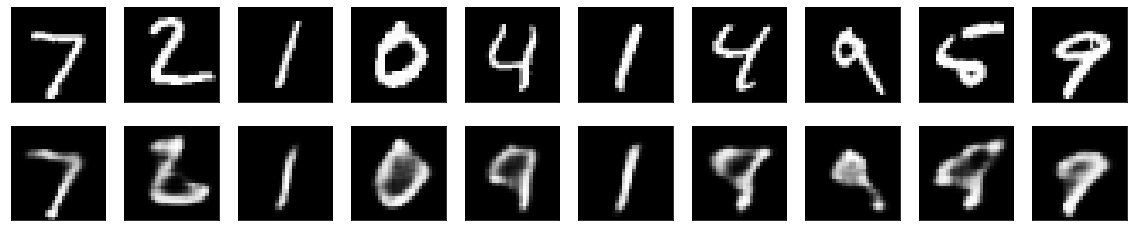

In [38]:
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()